<a href="https://colab.research.google.com/github/anwar-ai/Ultrasons-UT/blob/master/ultrason_UT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

![Texte alternatif…](https://scontent.fcmn3-1.fna.fbcdn.net/v/t1.0-9/15094443_340901582950323_9056609890889426918_n.jpg?_nc_cat=104&_nc_sid=2d5d41&_nc_ohc=SWH1UiDjuhoAX_lkqi3&_nc_ht=scontent.fcmn3-1.fna&oh=c96365a65955d3a4cd558aa6b4e37975&oe=5ED97845)

Anwar Aachati anwar.aachati@altran.com

In [1]:
!git clone https://github.com/anwar-ai/Ultrasons-UT 

Cloning into 'Ultrasons-UT'...
remote: Enumerating objects: 9, done.
remote: Counting objects: 100% (9/9), done.
remote: Compressing objects: 100% (7/7), done.
remote: Total 9 (delta 1), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (9/9), done.


In [0]:
!cd Ultrasons-UT/.

In [7]:
ls Ultrasons-UT/.

DATA_UT_PIFE_IPP.wav  README.md  UT.pdf


In [8]:
import  numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
def relu (d):
  r=np.zeros(d.shape[0])
  for i in range (d.shape[0]):
    if d[i]<0:
      r[i]=0
    else:
      r[i]=d[i]
  return r

In [0]:
from scipy.io.wavfile import read
a = read("Ultrasons-UT/DATA_UT_PIFE_IPP.wav")
data=np.array(a[1],dtype=float)

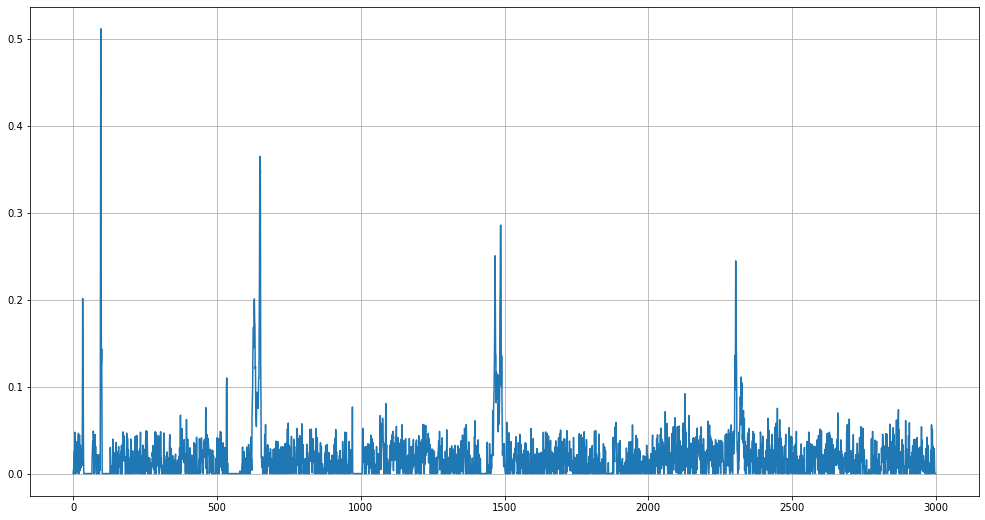

In [14]:
plt.figure(figsize=(17,9))
plt.plot(relu(data[47000:50000]))
plt.grid(True)
plt.show()

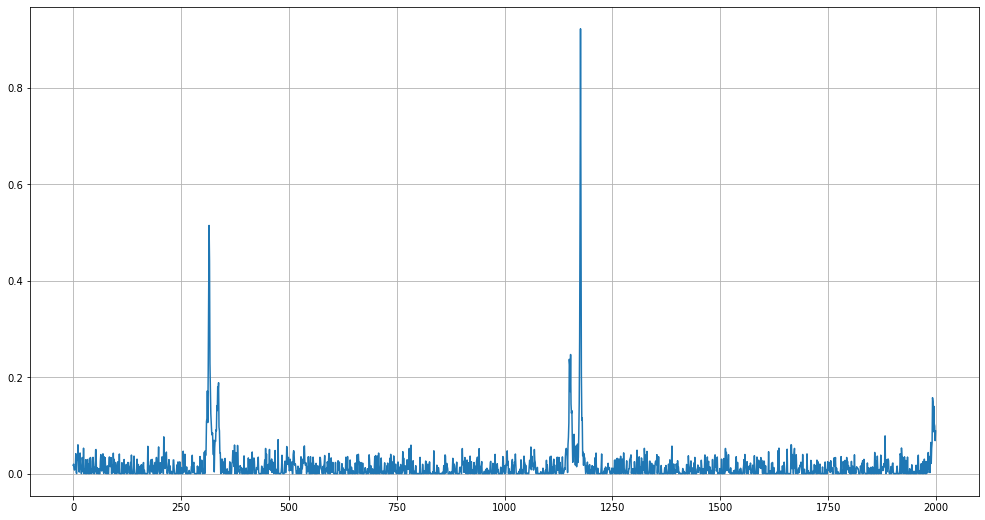

In [15]:
plt.figure(figsize=(17,9))
plt.plot(relu(data[23000:25000]))
plt.grid(True)
plt.show()

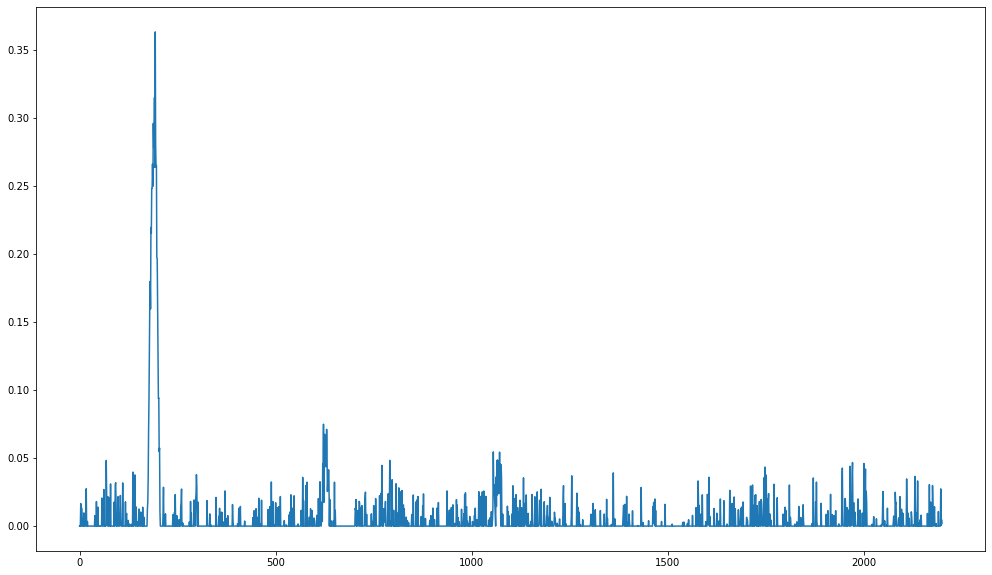

In [17]:
plt.figure(figsize=(17,10))
plt.plot(relu(-data[47800:50000] ))
plt.show()

In [19]:
d=data
pd.DataFrame(d).describe()

,0
count,61035.000000
mean,0.009463
std,0.042511
min,-1.000000
25%,-0.006359
50%,0.008105
75%,0.023068
max,1.000000


In [0]:
import pandas as pd

In [0]:
X=pd.DataFrame(data)

In [22]:
X.describe()

,0
count,61035.000000
mean,0.009463
std,0.042511
min,-1.000000
25%,-0.006359
50%,0.008105
75%,0.023068
max,1.000000


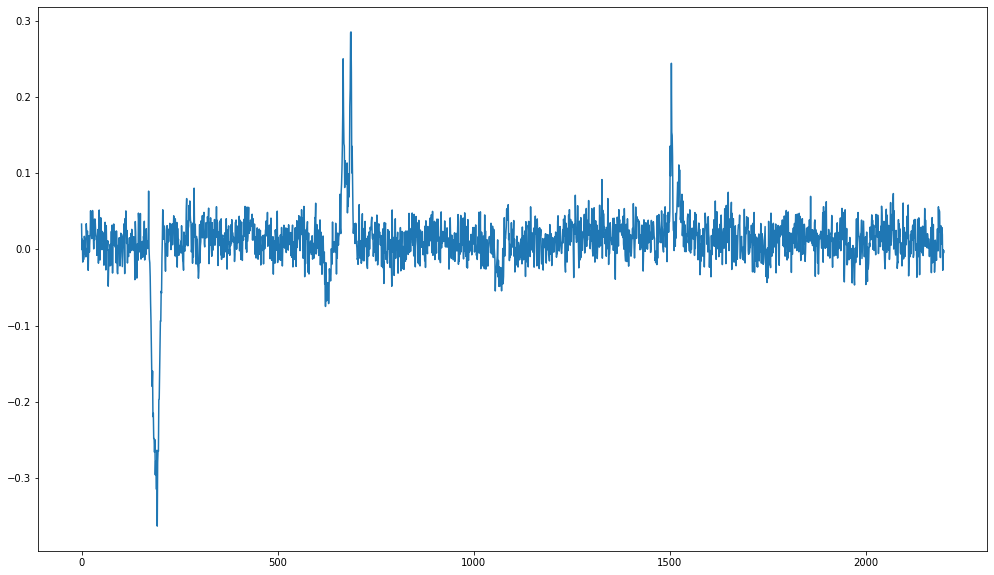

In [23]:
plt.figure(figsize=(17,10))
plt.plot(data[47800:50000])
plt.show()

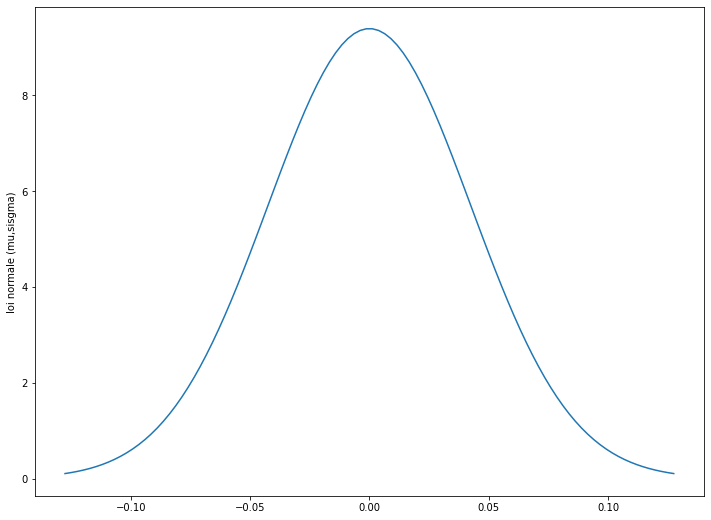

In [42]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as stats
import math
mu = 0.00
sigma =0.042511
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(12,9))
plt.plot(x, stats.norm.pdf(x, mu, sigma))
plt.ylabel("loi normale (mu,sisgma)")
plt.show()

<Figure size 864x648 with 0 Axes>

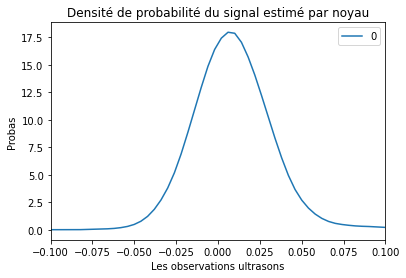

In [44]:
plt.figure(figsize=(12,9))
ax = X.plot.kde(title="Densité de probabilité du signal estimé par noyau")
plt.xlabel("Les observations ultrasons")
plt.ylabel("Probas")
plt.xlim(-0.1,0.1)
plt.show()

In [45]:
from scipy import stats
khi2, p = stats.normaltest(data[:])
alpha = 1e-3
print("p = {:g}".format(p))

p = 0


In [47]:
if p > alpha:  # H0 la population est normale
    print("on peut rejeter H0")
else:
    print("population normale")

population normale


In [48]:
stats.norm.pdf(data[200],0.042511,0.009463)

2.845018477058159e-07

In [0]:
def marker(donnees):
  l=np.zeros(donnees.shape[0])
  for i in range (donnees.shape[0]):
    if stats.norm.pdf(donnees[i],0.042511,0.009463)<2.845018477058159e-9 :
      l[i]=donnees[i]
  return  l
    

In [51]:
marker(data)

array([-0.02566149,  0.        ,  0.        , ...,  0.        ,
        0.        ,  0.        ])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  """


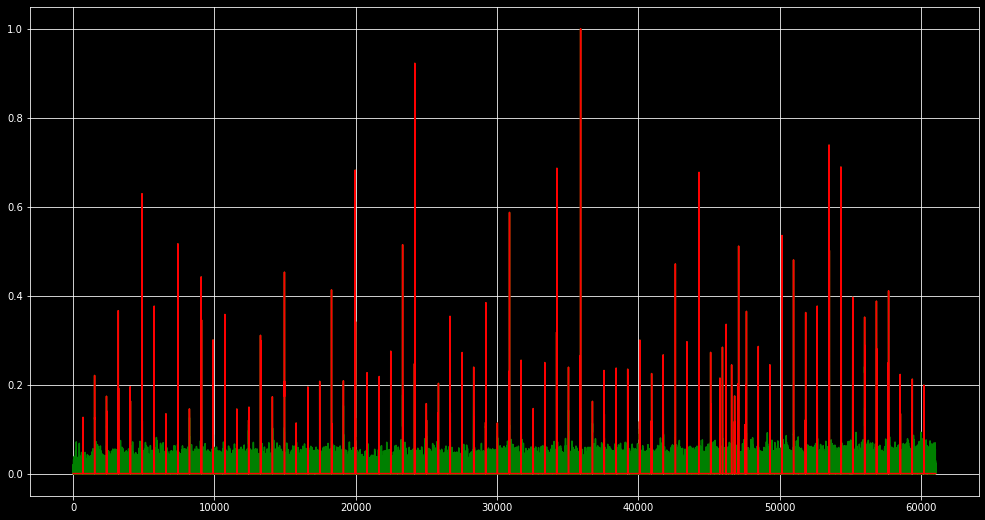

In [52]:
with plt.style.context('dark_background'):

  plt.figure(figsize=(17,9))
  plt.plot(relu(data),color='green')
  plt.subplot()
  plt.plot(relu(marker(data)),color='red')
  plt.grid(True)
  

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


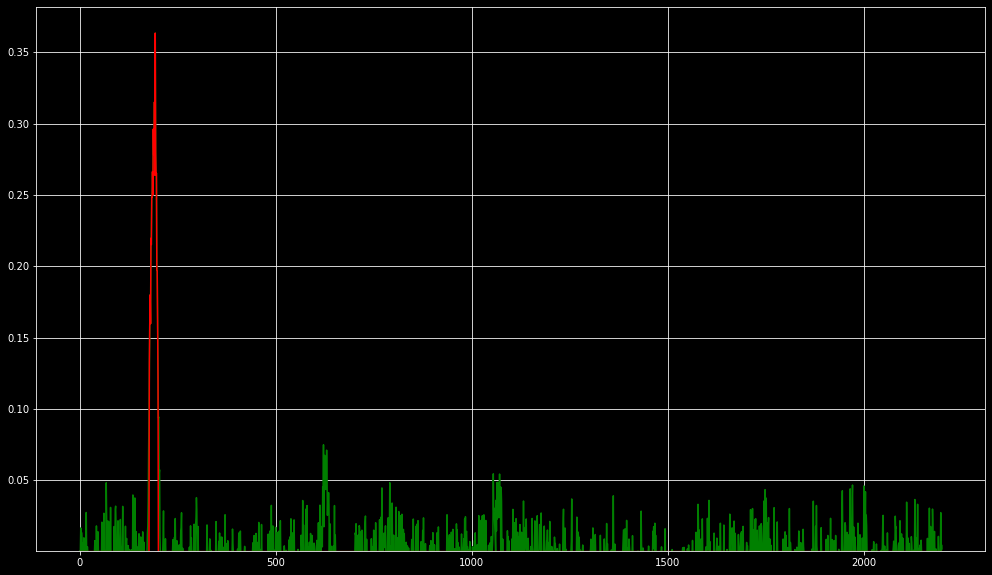

In [53]:
with plt.style.context('dark_background'):
  plt.figure(figsize=(17,10))
  plt.plot(relu(-data[47800:50000]),color='green')
  plt.subplot()
  plt.plot(marker(relu(-data[47800:50000])),color='red')
  plt.ylim(0.0006)
  plt.grid(True)

  plt.show()

In [54]:
 relu(-data[47000:50000])

array([0.00461358, 0.        , 0.        , ..., 0.00047383, 0.00476321,
       0.00187037])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


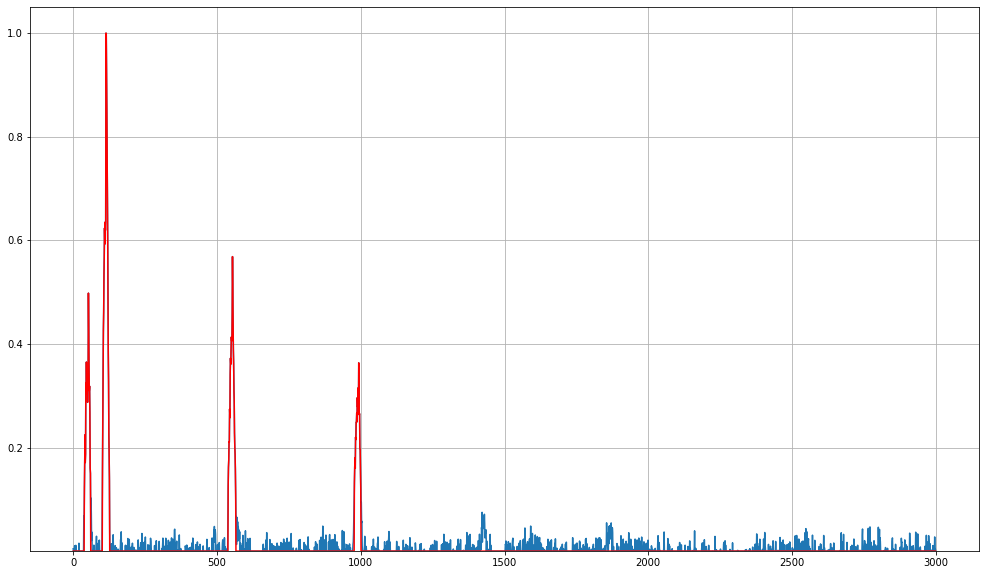

In [55]:
plt.figure(figsize=(17,10))
plt.plot(relu(-data[47000:50000]))
plt.subplot()
plt.plot(marker(relu(-data[47000:50000])),color='red')
plt.ylim(0.0006)
plt.grid(True)
plt.show()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until


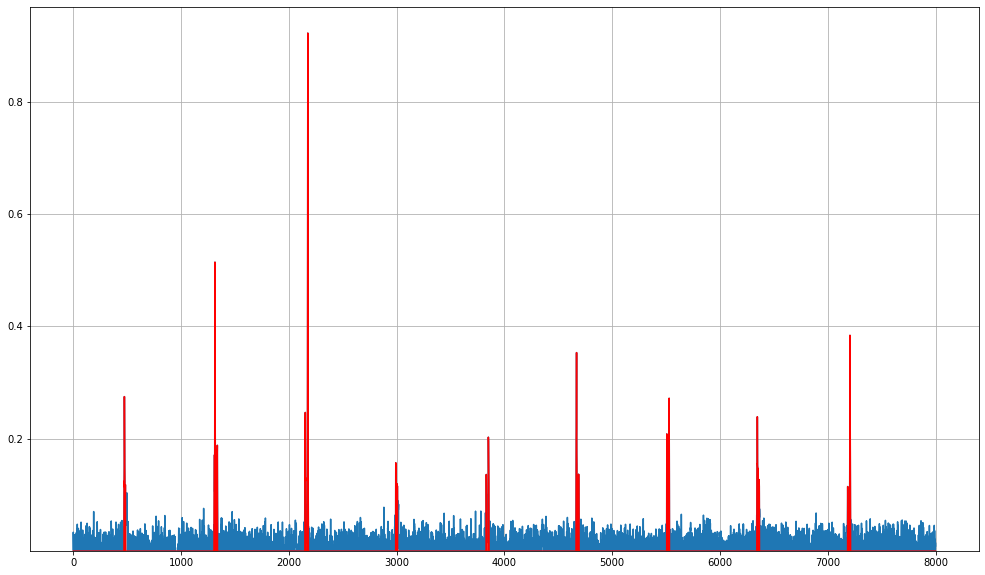

In [56]:
plt.figure(figsize=(17,10))
plt.plot(relu(data[22000: 30000]))
plt.subplot()
plt.plot(marker(relu(data[22000:30000 ])),color='red')
plt.ylim(0.0006)
plt.grid(True)
plt.show()